# Prepare data

In [1]:
import pandas as pd
# Preparing the data MATH Version

df_1 = pd.read_csv("../data/station_40.csv")
df_2 = pd.read_csv("../data/station_49.csv")
df_3 = pd.read_csv("../data/station_63.csv")
df_4 = pd.read_csv("../data/station_80.csv")

# col1 = [col + '_1' for col in df_1.columns]
# col2 = [col + '_2' for col in df_2.columns]
# col3 = [col + '_3' for col in df_3.columns]
# col4 = [col + '_4' for col in df_4.columns]
# col1[0] = col2[0] = col3[0] = col4[0] = "YEAR"

# df_1.columns = col1
# df_2.columns = col2
# df_3.columns = col3
# df_4.columns = col4

df_1.rename(columns=lambda x: x + '_1' if x != 'YEAR' else 'YEAR', inplace=True)
df_2.rename(columns=lambda x: x + '_1' if x != 'YEAR' else 'YEAR', inplace=True)
df_3.rename(columns=lambda x: x + '_1' if x != 'YEAR' else 'YEAR', inplace=True)
df_4.rename(columns=lambda x: x + '_1' if x != 'YEAR' else 'YEAR', inplace=True)

full_df = df_1.merge(df_2, on="YEAR").merge(df_3, on="YEAR").merge(df_4, on="YEAR")
full_df.head()

# df_1.rename(columns=lambda x: x + '_1' if x != 'YEAR' else 'YEAR', inplace=True)


/var/folders/gl/ch56vc4j2vv9x57cscgmt2s00000gn/T/ipykernel_2856/1467189060.py:25: FutureWarning: Passing 'suffixes' which cause duplicate columns {'W_14_1_x', 'W_11_1_x', 'W_13_1_x', 'W_2_1_x', 'W_10_1_x', 'W_15_1_x', 'W_3_1_x', 'YIELD_1_x', 'W_1_1_x', 'W_8_1_x', 'W_6_1_x', 'W_16_1_x', 'W_17_1_x', 'W_5_1_x', 'W_7_1_x', 'W_4_1_x', 'W_9_1_x', 'W_18_1_x', 'W_12_1_x'} in the result is deprecated and will raise a MergeError in a future version.
  full_df = df_1.merge(df_2, on="YEAR").merge(df_3, on="YEAR").merge(df_4, on="YEAR")


,YEAR,W_1_1_x,W_2_1_x,W_3_1_x,W_4_1_x,W_5_1_x,W_6_1_x,W_7_1_x,W_8_1_x,W_9_1_x,...,W_10_1_y,W_11_1_y,W_12_1_y,W_13_1_y,W_14_1_y,W_15_1_y,W_16_1_y,W_17_1_y,W_18_1_y,YIELD_1_y
0,0,21.389266,26.985066,23.813756,26.852214,25.096705,26.852109,25.730293,23.416002,21.038240,...,1.027391,1.228816,1.324273,2.309497,2.917570,0.769869,0.907157,3.401885,1.037317,10.51
1,1,21.314074,22.516442,24.072042,29.159849,29.522392,26.567033,28.249854,24.606161,19.268685,...,0.143191,0.925005,2.751680,1.196560,0.784046,1.505209,0.240757,1.617603,1.818209,6.61
2,2,20.875083,26.038845,24.516708,27.633776,26.951667,27.926496,26.534607,25.968638,23.554623,...,0.942601,1.811827,2.923051,0.384716,2.876004,1.535451,1.509938,1.652338,0.279352,6.86
3,3,20.553688,20.992986,22.859027,28.654018,26.705206,24.458350,25.146936,21.531644,22.961974,...,3.640015,0.956474,2.241502,1.893830,0.189264,2.049275,3.795690,0.404447,1.468172,5.32
4,4,21.523342,21.542900,23.034072,26.327315,30.362289,27.503657,27.839165,29.764479,18.290963,...,1.191167,0.049557,0.330440,2.860207,0.399063,0.506497,1.700047,0.216837,2.166599,6.32


In [2]:
import pandas as pd

# Importing the relevant csv files
station_40 = pd.read_csv("../data/station_40.csv")
station_49 = pd.read_csv("../data/station_49.csv")
station_63 = pd.read_csv("../data/station_63.csv")
station_80 = pd.read_csv("../data/station_80.csv")
dfs = [station_49, station_80, station_40, station_63]

# Selected Q values for the challenge
Q = [3.3241, 5.1292, 6.4897, 7.1301]

# Function putting the conditions on the rows
def select_subset(row, Qi):
    return row['W_13'] + row['W_14'] + row['W_15'] <= Qi

# Create a column "subset", which is True if the subset conditions are met
for i, df in enumerate(dfs):
    df['subset'] = df.apply(select_subset, Qi=Q[i], axis=1)

# Find the years where the conditions are met for each station
years_per_station = [set(df.loc[df['subset'], 'YEAR']) for df in dfs]

# Find the intersection of years for all stations
common_years = set.intersection(*years_per_station)

# Select the yields of each common_years and create a dataframe out of it
yield_data = {'YEAR': list(common_years)}
for i, df in enumerate(dfs):
    yield_data[f'YIELD_{i+1}'] = df.loc[df['YEAR'].isin(common_years), 'YIELD'].tolist()
    for j in range(13, 16):
        yield_data[f'W{j}_{i+1}'] = df.loc[df['YEAR'].isin(common_years), f'W_{j}'].tolist()

yield_df = pd.DataFrame(yield_data)

# yield_df.to_csv('CSVs/yields_subset_full.csv')

In [ ]:
station_40 = pd.read_csv("../data/station_40.csv")
station_49 = pd.read_csv("../data/station_49.csv")
station_63 = pd.read_csv("../data/station_63.csv")
station_80 = pd.read_csv("../data/station_80.csv")
dfs = [station_49, station_80, station_40, station_63]

In [127]:
def sum_R(row):
    return (row['W_13'] + row['W_14'] + row['W_15']) / 3

def sum_T(row):
    return row[1:10].mean()

# for i, df in enumerate(dfs):
#     df[f'T{i}'] = df.apply(sum_T, axis=1)
#     df[f'R{i}'] = df.apply(sum_R, axis=1)

# # Select the yields of each common_years and create a dataframe out of it
scenario_df = {'YEAR': range(len(dfs[0]))}
# for i, df in enumerate(dfs):
#     scenario_df[f'R{i}'] = df[f'R{i}']
#     scenario_df[f'T{i}'] = df[f'T{i}']
for i, df in enumerate(dfs):
    scenario_df[f'R{i}'] = df.apply(sum_R, axis=1)
    scenario_df[f'T{i}'] = df.apply(sum_T, axis=1)

scenario_df = pd.DataFrame(scenario_df)

scenario_df['R'] = scenario_df[['R0', 'R1', 'R2', 'R3']].mean(axis=1)
scenario_df['T'] = scenario_df[['T0', 'T1', 'T2', 'T3']].mean(axis=1)

scenario_df=scenario_df[['R', 'T']]

In [108]:
import numpy as np

def subset_scenario(df:pd.DataFrame, i:int):
    R1 = [-np.inf, 1.8]
    R2 = [1.8, 2.2]
    R3 = [2.2, np.inf]
    T1 = [-np.inf, 21.2]
    T2 = [21.2, 22]
    T3 = [22, np.inf]
    scenario = {
        "1":{"R":R1, "T":T1},
        "2":{"R":R1, "T":T2},
        "3":{"R":R1, "T":T3},
        "4":{"R":R2, "T":T1},
        "5":{"R":R2, "T":T2},
        "6":{"R":R2, "T":T3},
        "7":{"R":R3, "T":T1},
        "8":{"R":R3, "T":T2},
        "9":{"R":R3, "T":T3},
    }
    
    Rmin, Rmax = scenario[f'{i}']['R']
    Tmin, Tmax = scenario[f'{i}']['T'] 
    
    selector = (df['R'] > Rmin) & (df['R'] <= Rmax) & (df['T'] > Tmin) & (df['T'] <= Tmax)
    filtered_df = df[selector]

    return filtered_df

In [130]:
sc1 = subset_scenario(scenario_df, 1)

station_40.merge(sc1, how='inner', left_index=True, right_index=True)

,YEAR,W_1,W_2,W_3,W_4,W_5,W_6,W_7,W_8,W_9,...,W_14,W_15,W_16,W_17,W_18,YIELD,R2,T2,R,T
19,19,20.193555,24.168292,20.808746,25.818308,26.065538,24.942540,22.543139,21.697979,21.700287,...,0.501634,3.443753,3.612431,4.313942,6.744895,14.15,2.715718,23.104265,1.656016,20.214486
34,34,18.714398,18.483311,21.764326,23.462215,26.823104,27.744254,27.463992,24.665481,19.645094,...,1.831638,2.208611,3.001429,1.687746,3.688882,11.08,2.362908,23.196242,1.704576,20.693984
60,60,18.125372,22.141866,26.143340,27.521284,25.491673,28.297008,23.713829,23.580071,19.563685,...,2.365801,0.591284,2.687811,4.548575,3.096317,7.63,1.141153,23.842014,1.571121,21.141664
63,63,17.864394,22.272327,21.784558,24.664581,25.903168,26.223161,25.428740,25.422607,18.075196,...,1.163491,0.860401,3.939088,2.686804,3.962076,10.14,1.520462,23.070970,1.697597,20.499037
83,83,19.051027,21.201198,21.906853,27.331839,27.410875,24.901527,23.219233,25.078325,18.276974,...,1.588973,3.630925,3.415167,4.535410,5.383105,7.92,2.063509,23.153095,1.736981,20.371150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9901,9901,21.529653,22.227778,23.847248,27.377615,25.045848,25.445442,22.879877,22.641731,21.098990,...,0.893487,1.411851,1.513220,1.992347,6.132082,9.27,1.354732,23.566020,1.679314,21.003241
9911,9911,17.079652,21.389161,23.199238,25.389027,26.108970,29.454452,24.595661,24.285690,19.856639,...,0.711467,0.430531,4.701994,2.205944,7.523258,8.22,2.063573,23.484277,1.237850,21.078263
9982,9982,16.387694,21.435764,21.653236,24.744430,29.093761,26.829943,26.974755,23.672949,21.684756,...,1.327731,1.228722,1.012908,2.445195,7.379315,9.22,1.364120,23.608587,1.405345,20.987302
9986,9986,19.164874,24.358279,24.047223,23.494875,24.780565,26.819408,25.563987,22.601219,21.001386,...,2.892632,2.125932,1.656397,5.811266,6.171544,12.24,2.200006,23.536868,1.752650,20.903302


In [136]:
import sys
sys.path.append('../')
from scenario import get_scenario

test = get_scenario(1)

In [137]:
test[0]

,YEAR,W_1,W_2,W_3,W_4,W_5,W_6,W_7,W_8,W_9,...,W_12,W_13,W_14,W_15,W_16,W_17,W_18,YIELD,R,T
19,19,18.476308,23.817124,20.674186,24.532081,24.538233,24.059399,20.786797,20.047547,17.761069,...,1.882242,0.455027,1.250127,0.182744,2.901473,2.081361,2.080674,4.14,1.656016,20.214486
34,34,17.551278,18.332946,20.427173,23.673247,27.419524,27.465407,26.604432,22.851546,17.568044,...,1.133080,0.893728,0.042826,0.759109,1.333245,1.559959,1.164207,3.74,1.704576,20.693984
60,60,16.371976,20.685583,26.106958,27.942493,24.940137,28.198224,22.421124,22.178844,16.380707,...,1.316939,0.296521,1.047850,0.555946,2.500013,0.313765,1.698412,4.52,1.571121,21.141664
63,63,16.288702,20.956192,21.899313,24.420679,25.120857,25.121803,23.767839,22.577199,15.801733,...,1.669846,1.597490,2.391435,0.250845,2.254629,2.360824,1.559382,6.75,1.697597,20.499037
83,83,17.682848,20.138859,21.627761,26.758458,28.258324,23.577831,21.152038,22.010505,15.522964,...,1.647851,1.052453,1.493355,1.035515,2.258048,1.335619,3.006376,7.17,1.736981,20.371150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9901,9901,20.548314,21.550471,23.475104,27.707938,24.417285,23.434765,21.320479,20.283789,17.867473,...,2.044422,2.349402,0.213204,1.088904,0.829455,0.531750,1.691813,4.41,1.679314,21.003241
9911,9911,15.722764,20.589902,22.537174,25.554535,25.750910,31.323294,23.695815,23.103860,16.179540,...,2.840667,0.267777,1.217064,0.020744,3.130858,0.294607,3.793891,5.40,1.237850,21.078263
9982,9982,15.366417,21.285243,20.756372,25.006786,29.519730,26.549370,25.159052,20.973938,18.140168,...,2.740478,0.405960,0.749298,0.156631,0.696517,2.927454,3.230091,6.34,1.405345,20.987302
9986,9986,17.979879,23.856752,23.316355,22.573186,24.384860,26.531387,24.555355,20.032020,17.823074,...,1.777562,0.668692,0.590177,1.710277,0.526174,2.909663,2.142059,4.51,1.752650,20.903302


In [126]:
import os
os.path.join("../data/", "station_40.csv")

'../data/station_40.csv'

In [118]:
for i in range(1,10):
    a = subset_scenario(scenario_df, i).shape[0]
    print(a)

464
1290
1678
534
1254
1082
1007
1690
1001


In [62]:
dfs[0]['R0']

0        3.380908
1        2.854533
2        1.335289
3        5.120680
4        5.519273
          ...    
9995     3.011101
9996     1.407260
9997     1.317009
9998    10.060905
9999     2.913160
Name: R0, Length: 10000, dtype: float64

# GMM Model

In [ ]:
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np
import ot
from joblib import dump, load


yields_true = pd.read_csv('../CSVs/yields_subset.csv').iloc[:, 2:]
gm = GaussianMixture(n_components=4, n_init=10)
gm.fit(yields_true)
dump(gm, '../parameters/gmm.joblib')

noise = np.load('../data/noise.npy')[:, :4]

loaded_model = load('../parameters/gmm.joblib')

weights = loaded_model.weights_
means = loaded_model.means_
covariances = loaded_model.covariances_

simul = np.zeros((4,10_000))
for j in range(10000):
    component_idx = np.random.choice(np.arange(len(weights)), p=weights)
    S = np.linalg.cholesky(covariances[component_idx])
    simul[:, j] = S @ noise[j, :] + means[component_idx]

simul = (simul * (simul > 0)).T

gen_rnd = simul[np.random.randint(0, 9999, 1000)]

print(ot.sliced.sliced_wasserstein_distance(yields_true.to_numpy(), gen_rnd, seed=0))

# Predire Y à partir de W

## 1. Load and prepare the data

In [1]:
import pandas as pd
import os 

DATA_PATH = '../data/'

def join_station():
    df_1 = pd.read_csv(os.path.join(DATA_PATH, 'station_49.csv'))
    df_2 = pd.read_csv(os.path.join(DATA_PATH, 'station_80.csv'))
    df_3 = pd.read_csv(os.path.join(DATA_PATH, 'station_40.csv'))
    df_4 = pd.read_csv(os.path.join(DATA_PATH, 'station_63.csv'))

    df_1.rename(columns=lambda col: col + '_1' if col != 'YEAR' else 'YEAR', inplace=True)
    df_2.rename(columns=lambda col: col + '_2' if col != 'YEAR' else 'YEAR', inplace=True)
    df_3.rename(columns=lambda col: col + '_3' if col != 'YEAR' else 'YEAR', inplace=True)
    df_4.rename(columns=lambda col: col + '_4' if col != 'YEAR' else 'YEAR', inplace=True)

    full_df = df_1.merge(df_2, on="YEAR").merge(df_3, on="YEAR").merge(df_4, on="YEAR")
    return full_df

def get_train_test_data(df:pd.DataFrame):
    Y = df[["YIELD_1", "YIELD_2", "YIELD_3", "YIELD_4"]]
    col_W = [colonne for colonne in df.columns if colonne.startswith('W')]
    W = df[col_W]
    return W, Y

In [2]:
full_df = join_station()
W, Y = get_train_test_data(full_df)

## 2. Prediction

### a. Linear regression

In [50]:
import matplotlib.pyplot as plt
import numpy as np
def plot_yields_comparaison(pred, Y, method, seed=0):
    avg = []
    for i in range(4):
        plt.figure(figsize=(4,2))
        plt.hist([pred[:,i], Y[f'YIELD_{i+1}']], label=['pred', 'true'], bins=50)
        plt.title(f'{method} - YIELD_{i+1}')
        plt.legend()
        swd = ot.sliced.sliced_wasserstein_distance(pd.DataFrame(pred[:,i]).to_numpy(), Y[[f'YIELD_{i+1}']].to_numpy())
        print(f'SWD {i} = {swd}')
        avg.append(swd)
    plt.show()
    print(f'Mean SWD is : {np.mean(avg)}')

SWD 0 = 0.34949546928114855
SWD 1 = 0.4042291014461016
SWD 2 = 0.6002387568048849
SWD 3 = 0.4243711970100712
Mean SWD is : 0.44458363113555155


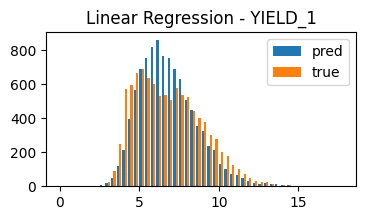

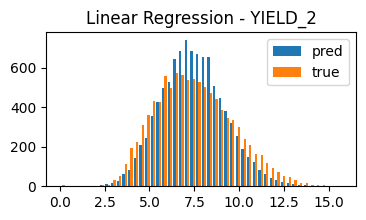

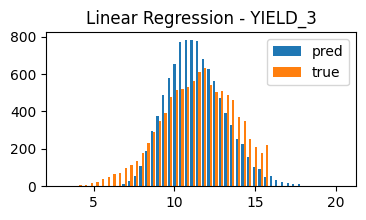

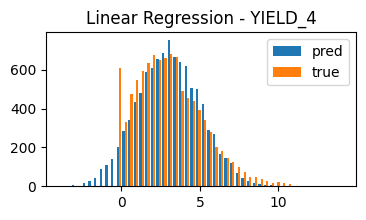

In [49]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(W, Y)

pred_lr = reg.predict(W)

plot_yields_comparaison(pred_lr, Y, 'Linear Regression')

### b. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import ot

rf = RandomForestRegressor()

rf.fit(W, Y)

pred_rf = rf.predict(W)

# plot_yields_comparaison(pred_rf, Y, 'Random Forest')

### c. XGBoost

SWD 0 = 0.10842277108955489
SWD 1 = 0.11740662426906864
SWD 2 = 0.12509394490918804
SWD 3 = 0.05969570427470053


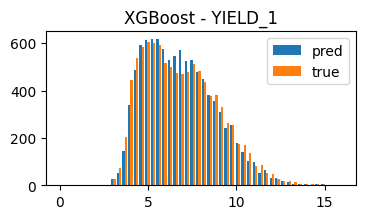

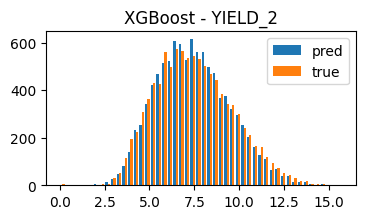

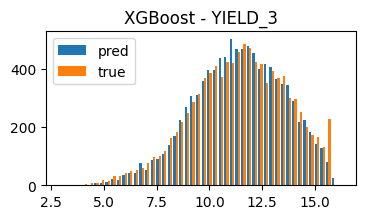

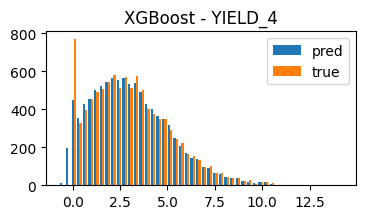

Mean SWD is : 0.10265476113562802


In [46]:
import xgboost as xgb

model_xgb= xgb.XGBRegressor()

# Train the model
model_xgb.fit(W, Y)

# Make predictions
pred_xgb = model_xgb.predict(W)

plot_yields_comparaison(pred_xgb, Y, 'XGBoost')

### d. NN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn = Sequential([
    Dense(64, activation='relu', input_shape=(72,)),
    Dense(64, activation='relu'),
    Dense(4)  # Output layer with 4 neurons for 4 target values
])

nn.compile(optimizer='adam', loss='mse')

nn.fit(W, Y, epochs=50, batch_size=32)

pred_nn = nn.predict(W)

# plot_yields_comparaison(pred_nn, Y, 'NN')

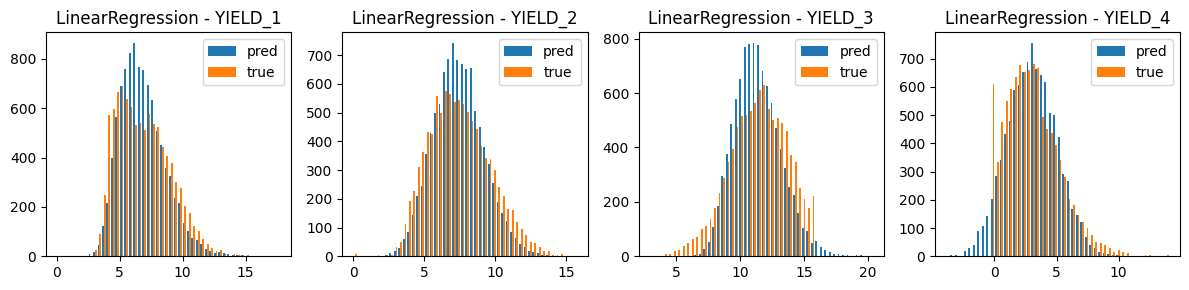

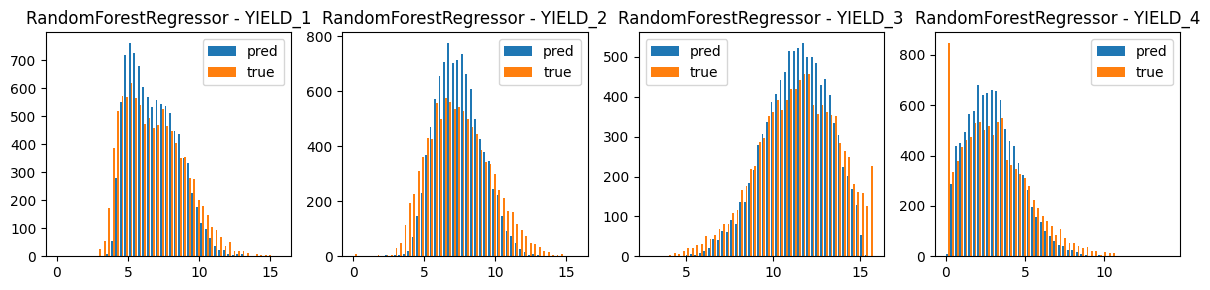

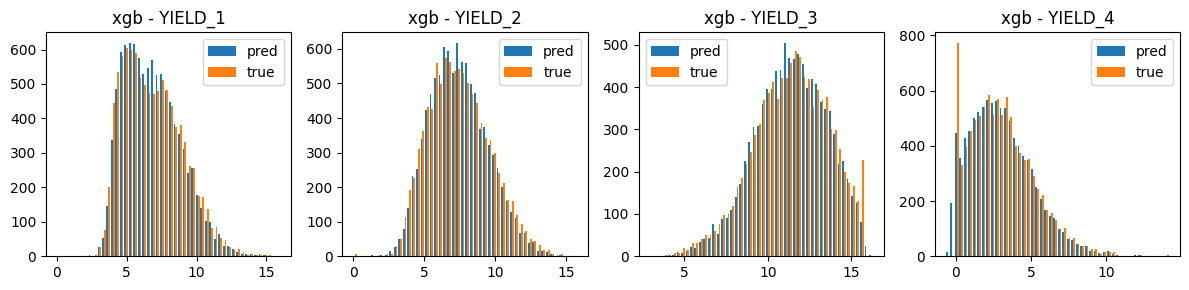

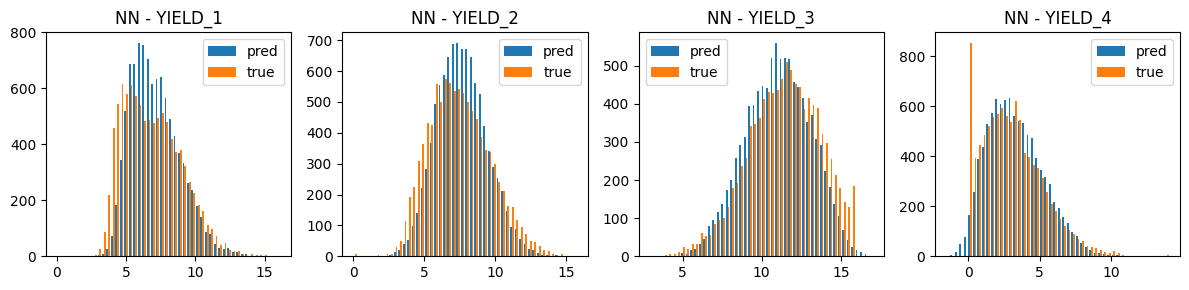

In [8]:
predictions = [pred_lr, pred_rf, pred_xgb, pred_nn]
method = ['LinearRegression', 'RandomForestRegressor', 'xgb', 'NN']

for idx, pred in enumerate(predictions):
    fig, axs = plt.subplots(1, 4, figsize=(12, 3))
    for i in range(4): 
        axs[i].hist([pred[:,i], Y[f'YIELD_{i+1}']], label=['pred', 'true'], bins=50)
        axs[i].set_title(f'{method[idx]} - YIELD_{i+1}')
        axs[i].legend()
    plt.tight_layout()
    plt.show()

## 3. Define SWD 'weighted'

In [69]:
# Aff R and T to split in scenario 

def add_T_and_R(df:pd.DataFrame):
    df = df.copy()
    df["T"] = np.sum(df[['W_1_1', 'W_2_1', 'W_3_1', 'W_4_1', 'W_5_1', 'W_6_1', 'W_7_1','W_8_1', 'W_9_1', 
                    'W_1_2', 'W_2_2', 'W_3_2', 'W_4_2', 'W_5_2', 'W_6_2', 'W_7_2', 'W_8_2', 'W_9_2',
                    'W_1_3', 'W_2_3', 'W_3_3', 'W_4_3', 'W_5_3','W_6_3', 'W_7_3', 'W_8_3', 'W_9_3',
                    'W_1_4', 'W_2_4', 'W_3_4', 'W_4_4', 'W_5_4', 'W_6_4', 'W_7_4', 'W_8_4', 'W_9_4'
                    ]], axis=1) / 36
    df["R"] = np.sum(df[['W_13_1', 'W_14_1','W_15_1', 'W_13_2', 'W_14_2', 'W_15_2', 
                    'W_13_3', 'W_14_3', 'W_15_3', 'W_13_4', 'W_14_4', 'W_15_4'
                    ]], axis=1) / 12
    return df

full_df = join_station()
full_df_rt = add_T_and_R(full_df)
full_df_rt.head()

,YEAR,W_1_1,W_2_1,W_3_1,W_4_1,W_5_1,W_6_1,W_7_1,W_8_1,W_9_1,...,W_12_4,W_13_4,W_14_4,W_15_4,W_16_4,W_17_4,W_18_4,YIELD_4,T,R
0,0,20.487164,26.089329,25.394672,27.024097,24.426756,26.420241,25.534358,21.369482,18.577526,...,2.101091,1.141454,2.167033,7.972668,1.555216,6.219460,2.081787,5.97,22.404683,2.122557
1,1,21.430837,22.228488,24.205256,29.859199,30.434175,26.467017,27.300290,22.509277,16.388211,...,5.583977,0.319974,1.612761,3.304209,0.060819,1.540583,3.214933,5.77,22.910263,1.443749
2,2,18.841767,25.165941,24.169267,28.742330,27.342035,27.945379,25.710641,22.343698,19.797961,...,2.165009,2.165768,1.791010,3.012968,4.316012,2.021236,0.814444,8.65,23.096885,1.401006
3,3,18.359661,20.235180,22.714217,30.017206,27.192345,23.159092,23.287619,19.477149,18.917730,...,4.716563,2.837129,0.638416,2.147741,3.114913,1.106072,0.870118,1.07,21.252078,1.563658
4,4,21.125963,23.270596,22.949896,26.594044,31.557704,28.464610,27.306957,26.999664,16.666535,...,1.472874,1.235341,3.050564,0.899664,1.561179,0.975300,3.242242,7.40,23.344850,1.398759


In [79]:
# Create a dict to store scenario info 

import sys
sys.path.append('../')
from utils.scenario import subset_scenario

dict_scenario = {}
for scenario in range(1, 10):
    sc = subset_scenario(full_df_rt, scenario)
    print(sc.shape)
    W, y = get_train_test_data(sc)
    dict_scenario[f'scenario_{scenario}'] = {"full_df_rt" :sc,
                                             "W" :W,
                                             "y" :y}

(464, 79)
(1290, 79)
(1678, 79)
(534, 79)
(1254, 79)
(1082, 79)
(1007, 79)
(1690, 79)
(1001, 79)


In [86]:
# Predict Y on each scenario 

import xgboost as xgb

for scenario in dict_scenario.keys():
    W = dict_scenario[scenario]["W"]
    y = dict_scenario[scenario]["y"]
    model_xgb= xgb.XGBRegressor()
    model_xgb.fit(W, y)
    pred_xgb = model_xgb.predict(W)
    dict_scenario[scenario]["pred"] = pred_xgb

In [105]:
dict_scenario["scenario_1"]["y"][["YIELD_1"]].to_numpy().shape

(464, 1)

In [126]:
# Compute the SWE on each Scenario (i.e. on each Y and then mean it)

for scenario in dict_scenario.keys():
    swds = []
    for i in range(4):
        y_pred = dict_scenario[scenario]["pred"][:,i]
        y_true = dict_scenario[scenario]["y"][[f'YIELD_{i+1}']]
        # @TODO: CHECK Pourquoi ?
        # Bizarre de devoir transformer en pandas puis en numpy
        swd = ot.sliced_wasserstein_distance(pd.DataFrame(y_pred).to_numpy(), y_true.to_numpy())
        swds.append(swd)
        dict_scenario[scenario][f'swd_{i+1}'] = swd
    dict_scenario[scenario]["mean_swd"] = np.mean(swds)

Mean SWD of scenario_1 is: 0.0005064309983681219


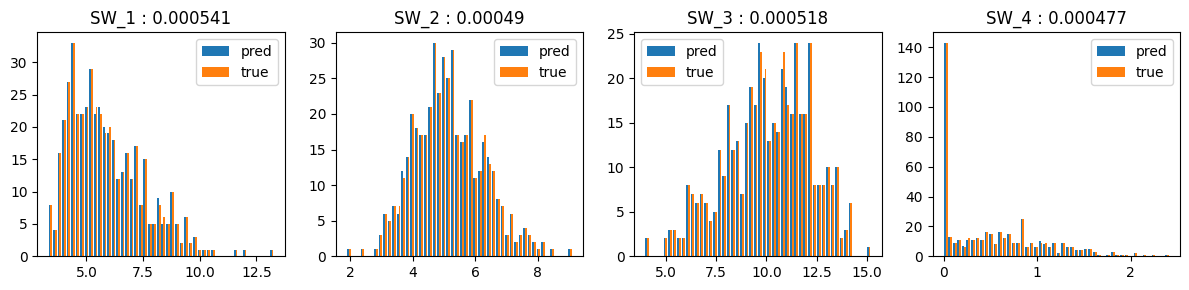

Mean SWD of scenario_2 is: 0.006087601753213756


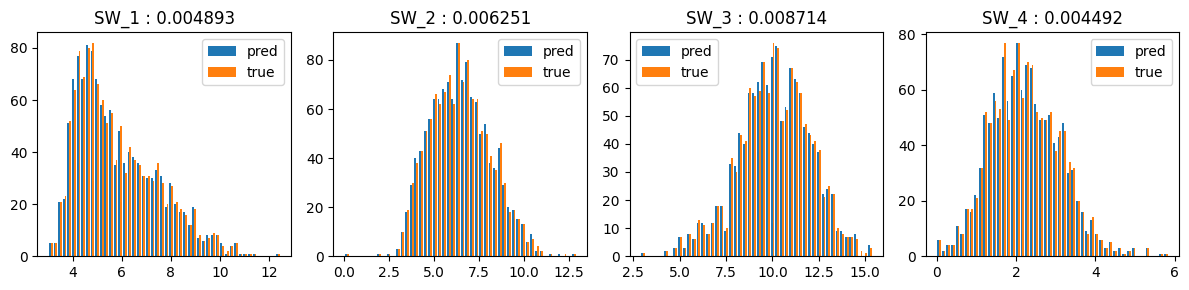

Mean SWD of scenario_3 is: 0.011026291085369356


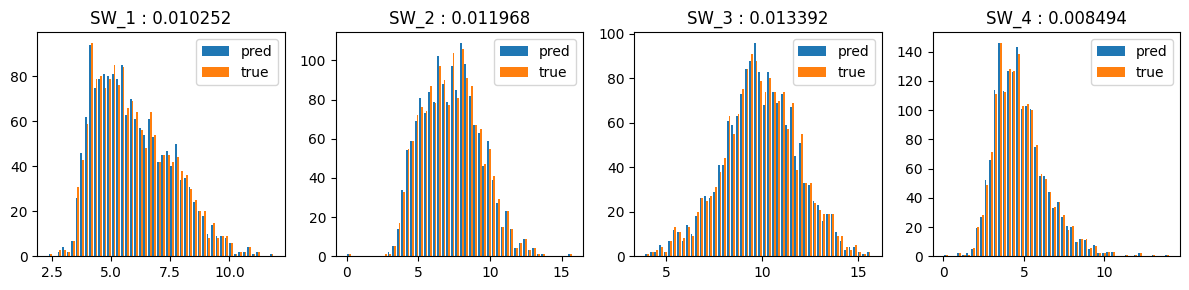

Mean SWD of scenario_4 is: 0.0005253762145931986


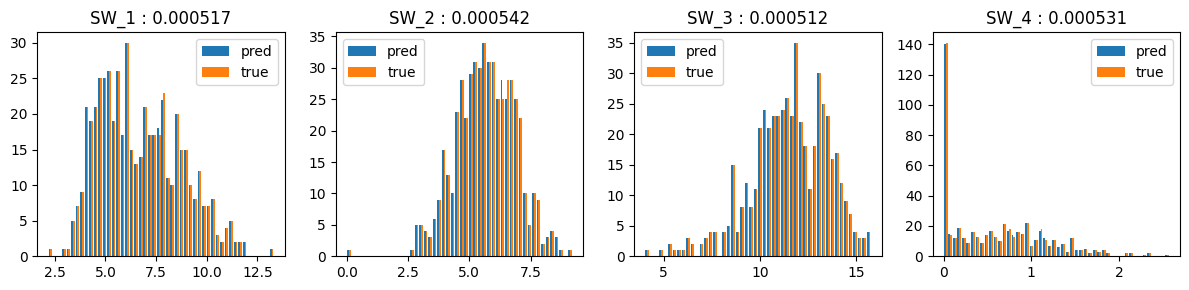

Mean SWD of scenario_5 is: 0.005483593063886645


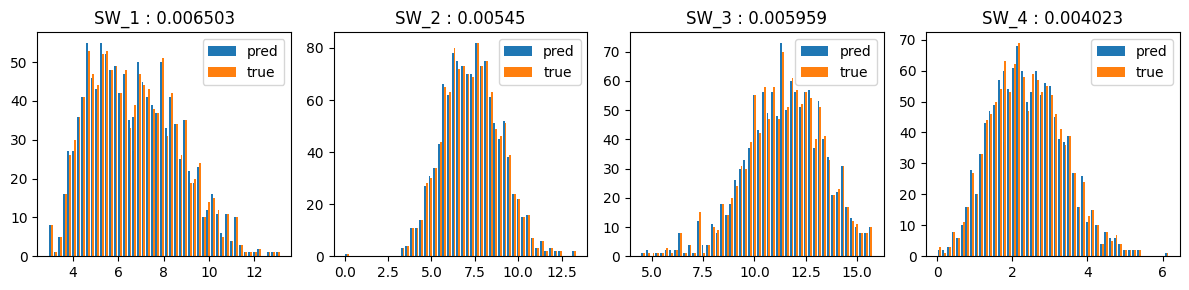

Mean SWD of scenario_6 is: 0.0052024994161622585


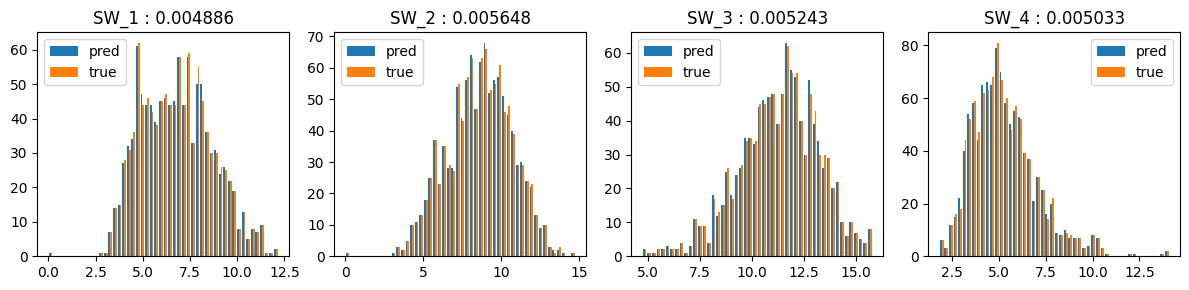

Mean SWD of scenario_7 is: 0.003929762095689327


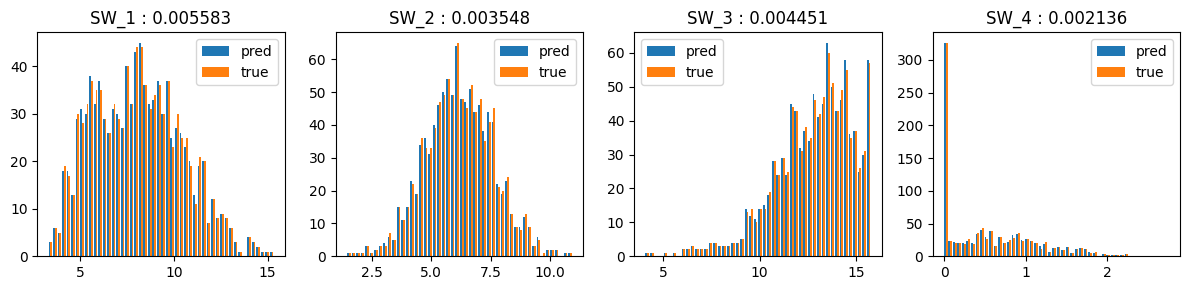

Mean SWD of scenario_8 is: 0.010256025859191189


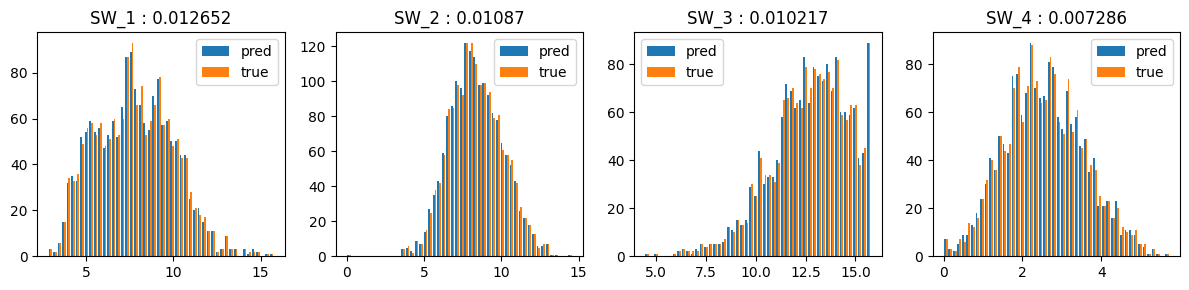

Mean SWD of scenario_9 is: 0.004555504074496308


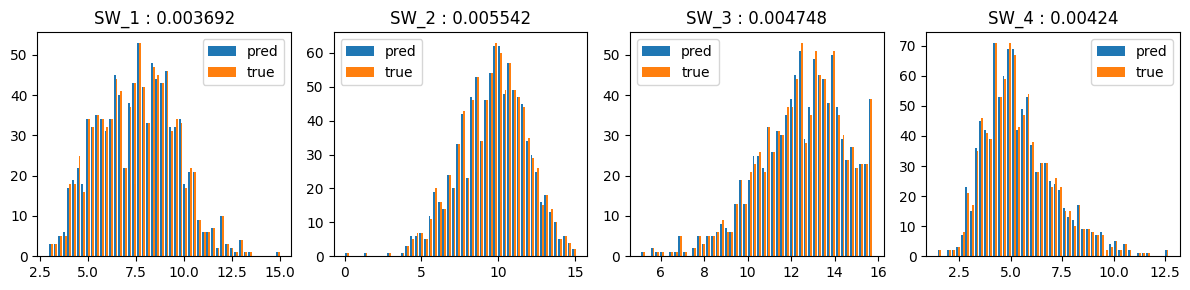

In [125]:
# Display the hist and the SWD for each scenario

for scenario in dict_scenario.keys():
    print(f"Mean SWD of {scenario} is: {dict_scenario[scenario]['mean_swd']}")
    fig, axs = plt.subplots(1, 4, figsize=(12, 3))
    for i in range(4): 
        axs[i].hist([dict_scenario[scenario]["pred"][:,i], dict_scenario[scenario]["y"][f'YIELD_{i+1}']], label=['pred', 'true'], bins=50)
        axs[i].set_title(f'{scenario} - YIELD_{i+1}')
        axs[i].set_title(f'SW_{i+1} : {round(dict_scenario[scenario][f"swd_{i+1}"], 6)}')
        axs[i].legend()
    plt.tight_layout()
    plt.show()
    

In [142]:
try:
    assert full_df.shape[0] == 10000
    a  =1
    b =2
    # Place here the code you want to execute if the condition is true
    print("The first dimension of full_df is equal to 100.")
except AssertionError:
    # If the condition is not met, print an error message or take other appropriate action
    print("The first dimension of full_df is not equal to 100. Please check your data.")


The first dimension of full_df is equal to 100.


In [145]:
# Compute the final loss

n_tot = 10_000
loss = 0
try:
    assert full_df.shape[0] == n_tot
    for scenario in dict_scenario.keys():
        swd = dict_scenario[scenario]["mean_swd"]
        n = dict_scenario[scenario]["y"].shape[0]
        loss += (1 - n/n_tot) * swd
    print(f"The final SWD using weight is {loss}")
except AssertionError:
    print("The first dimension of full_df is not equal to n_tot. Please check your data.")

The final SWD using weight is 0.041050464658734784


## 4. Define SWD as a loss => NOT working, it is only as a score

In [89]:
from sklearn.metrics import make_scorer
import ot

# Create a scorer using the custom loss function
custom_scorer = make_scorer(ot.sliced.sliced_wasserstein_distance, greater_is_better=False)